In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 


# read the data and store it in df variable
path = 'data_team-9/health_indicators.csv'
health_indicators_df = pd.read_csv(path)

In [2]:
path = 'data_team-9/bcg.csv'
bcg_df = pd.read_csv(path, header=1)

In [3]:
path = 'data_team-9/life_expectancy.csv'
life_expectance_df = pd.read_csv(path)

In [4]:
path = 'data_team-9/worldometers_coronavirus.csv'
worldmeters_coronavirus_df = pd.read_csv(path)

In [5]:
health_indicators_df.columns


Index(['Country_Region', 'first_1ConfirmedCases', 'first_1Fatalities',
       'first_10ConfirmedCases', 'first_50ConfirmedCases',
       'first_100ConfirmedCases', 'cases_growth', 'death_growth',
       'Cardiovascular diseases (%)', 'Cancers (%)',
       'Diabetes, blood, & endocrine diseases (%)', 'Respiratory diseases (%)',
       'Liver disease (%)', 'Diarrhea & common infectious diseases (%)',
       'Musculoskeletal disorders (%)', 'HIV/AIDS and tuberculosis (%)',
       'Malaria & neglected tropical diseases (%)',
       'Nutritional deficiencies (%)', 'pneumonia-death-rates',
       'Share of deaths from smoking (%)', 'alcoholic_beverages',
       'animal_fats', 'animal_products', 'aquatic_products,_other',
       'cereals_-_excluding_beer', 'eggs', 'fish,_seafood',
       'fruits_-_excluding_wine', 'meat', 'milk_-_excluding_butter',
       'miscellaneous', 'offals', 'oilcrops', 'pulses', 'spices',
       'starchy_roots', 'stimulants', 'sugar_&_sweeteners', 'treenuts',
       '

In [6]:
health_indicators_df['life expectancy at birth'].describe()

count    164.000000
mean      73.467683
std        7.248634
min       52.800000
25%       68.800000
50%       75.250000
75%       78.525000
max       86.000000
Name: life expectancy at birth, dtype: float64

In [7]:
#create a dataframe with only necessary columns
mini_health_indicators_df = health_indicators_df[['Country_Region','bcg_coverage', 'life expectancy at birth']]
print(mini_health_indicators_df)

         Country_Region  bcg_coverage  life expectancy at birth
0           Afghanistan          86.0                      52.8
1               Albania          99.0                      79.0
2               Algeria          99.0                      77.5
3               Andorra           NaN                      83.0
4                Angola          79.0                      61.3
..                  ...           ...                       ...
175           Venezuela          82.0                      71.0
176             Vietnam          97.0                      74.4
177  West Bank and Gaza           NaN                       NaN
178              Zambia          99.0                      53.6
179            Zimbabwe          90.0                      62.3

[180 rows x 3 columns]


In [8]:
#remove the rows (countries) with missing data  
mini_health_indicators_df_without_na = mini_health_indicators_df.dropna()
print(mini_health_indicators_df_without_na)

    Country_Region  bcg_coverage  life expectancy at birth
0      Afghanistan          86.0                      52.8
1          Albania          99.0                      79.0
2          Algeria          99.0                      77.5
4           Angola          79.0                      61.3
6        Argentina          99.0                      77.8
..             ...           ...                       ...
174     Uzbekistan          99.0                      74.8
175      Venezuela          82.0                      71.0
176        Vietnam          97.0                      74.4
178         Zambia          99.0                      53.6
179       Zimbabwe          90.0                      62.3

[138 rows x 3 columns]


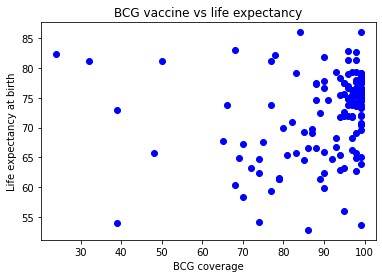

In [9]:
# show distribution of the results
plt.scatter(mini_health_indicators_df_without_na['bcg_coverage'], mini_health_indicators_df_without_na['life expectancy at birth'], color = 'blue')
plt.title("BCG vaccine vs life expectancy")
plt.xlabel("BCG coverage")
plt.ylabel("Life expectancy at birth")
plt.show()

In [10]:
# show that even countries with high bcg coverage have lower life expectancy
mini_health_indicators_df_without_na.loc[(mini_health_indicators_df_without_na['life expectancy at birth'] <= 60), ['Country_Region', 'bcg_coverage']]

,Country_Region,bcg_coverage
0,Afghanistan,86.0
33,Central African Republic,74.0
34,Chad,70.0
116,Mozambique,95.0
122,Niger,77.0
147,Sierra Leone,90.0
151,Somalia,39.0
178,Zambia,99.0


In [11]:
# show that even countries with lower bcg coverage have higher life expectancy
mini_health_indicators_df_without_na.loc[(mini_health_indicators_df_without_na['bcg_coverage'] <= 40), ['Country_Region', 'life expectancy at birth']]

,Country_Region,life expectancy at birth
134,Portugal,81.1
151,Somalia,54.0
157,Sweden,82.4
170,Ukraine,72.9


In [12]:
worldmeters_coronavirus_df.columns


Index(['continent', 'country_region', 'total_cases', 'total_deaths',
       'total_recovered', 'active_cases', 'critical', 'total cases/\n1M pop',
       'deaths/\n1M pop', 'total_tests', 'tests/\n1M pop', 'population'],
      dtype='object')

In [13]:
worldmeters_coronavirus_df.head()

,continent,country_region,total_cases,total_deaths,total_recovered,active_cases,critical,total cases/\n1M pop,deaths/\n1M pop,total_tests,tests/\n1M pop,population
0,Europe,Russia,"405,843","4,693","171,883","229,267","2,300","2,781",32,"10,643,124","72,933","145,929,507"
1,Europe,Spain,"286,509","27,127","196,958","62,424",617,"6,128",580,"4,063,843","86,921","46,753,345"
2,Europe,UK,"274,762","38,489",NaN,NaN,"1,559","4,049",567,"4,285,738","63,158","67,856,881"
3,Europe,Italy,"232,997","33,415","157,507","42,075",435,"3,853",553,"3,878,739","64,144","60,468,778"
4,Europe,France,"188,882","28,802","68,355","91,725","1,319","2,894",441,"1,384,633","21,217","65,261,942"


In [14]:
# question: What is the most Covid-19 affected continent in terms of infected cases and deaths?
worldmeters_coronavirus_df.continent.unique()

array(['Europe', 'North America', 'Asia', 'South America', 'Africa',
       'Oceania'], dtype=object)

In [15]:
worldmeters_coronavirus_df.continent.value_counts()

Africa           57
Asia             49
Europe           48
North America    39
South America    14
Oceania           6
Name: continent, dtype: int64

In [16]:
# create dataframe with total infected cases and deaths per continent: Europe
europe_df = worldmeters_coronavirus_df.loc[worldmeters_coronavirus_df['continent'] == 'Europe', ['total_cases','total_deaths']]
# europe_df.head(10)
# europe_df.count()
# europe_df.info()
europe_df_int = europe_df.apply(lambda x: x.str.replace(',',''))
europe_df_int_na = europe_df_int.dropna()
# europe_df['total_cases'] = pd.to_numeric(europe_df['total_cases'])
total_cases_europe = europe_df_int_na.total_cases.astype(int).sum()
total_deaths_europe = europe_df_int_na.total_deaths.astype(int).sum()

In [17]:
# create dataframe with total infected cases and deaths per continent: North America
north_america_df = worldmeters_coronavirus_df.loc[worldmeters_coronavirus_df['continent'] == 'North America', ['total_cases','total_deaths']]
# north_america_df.head(10)
# north_america_df.count()
north_america_df_int = north_america_df.apply(lambda x: x.str.replace(',',''))
north_america_df_int_na = north_america_df_int.dropna()
total_cases_NA = north_america_df_int_na.total_cases.astype(int).sum()
total_deaths_NA = north_america_df_int_na.total_deaths.astype(int).sum()

In [18]:
# create dataframe with total infected cases and deaths per continent: Asia
asia_df = worldmeters_coronavirus_df.loc[worldmeters_coronavirus_df['continent'] == 'Asia', ['total_cases','total_deaths']]
# asia_df.head(10)
# asia_df.count()
asia_df_int = asia_df.apply(lambda x: x.str.replace(',',''))
asia_df_int_na = asia_df_int.dropna()
total_cases_asia = asia_df_int_na.total_cases.astype(int).sum()
total_deaths_asia = asia_df_int_na.total_deaths.astype(int).sum()

In [19]:
# create dataframe with total infected cases and deaths per continent: South America
south_america_df = worldmeters_coronavirus_df.loc[worldmeters_coronavirus_df['continent'] == 'South America', ['total_cases','total_deaths']]
# south_america_df.head(10)
# south_america_df.count()
south_america_df_int = south_america_df.apply(lambda x: x.str.replace(',',''))
south_america_df_int_na = south_america_df_int.dropna()
total_cases_SA = south_america_df_int_na.total_cases.astype(int).sum()
total_deaths_SA = south_america_df_int_na.total_deaths.astype(int).sum()

In [20]:
# create dataframe with total infected cases and deaths per continent: Africa
afrika_df = worldmeters_coronavirus_df.loc[worldmeters_coronavirus_df['continent'] == 'Africa', ['total_cases','total_deaths']]
# afrika_df.head(10)
# afrika_df.count()
afrika_df_int = afrika_df.apply(lambda x: x.str.replace(',',''))
afrika_df_int_na = afrika_df_int.dropna()
total_cases_afrika = afrika_df_int_na.total_cases.astype(int).sum()
total_deaths_afrika = afrika_df_int_na.total_deaths.astype(int).sum()

In [21]:
# create dataframe with total infected cases and deaths per continent: Oceania
oceania_df = worldmeters_coronavirus_df.loc[worldmeters_coronavirus_df['continent'] == 'Oceania', ['total_cases','total_deaths']]
# oceania_df.head(10)
# oceania_df.count()
oceania_df_int = oceania_df.apply(lambda x: x.str.replace(',',''))
oceania_df_int_na = oceania_df_int.dropna()
total_cases_oceania = oceania_df_int_na.total_cases.astype(int).sum()
total_deaths_oceania = oceania_df_int_na.total_deaths.astype(int).sum()

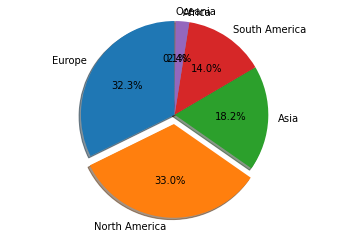

In [22]:
# visualizing question: What is the most Covid-19 affected continent in terms of infected cases and deaths?
labels = 'Europe', 'North America', 'Asia', 'South America', 'Africa', 'Oceania'
sizes = [total_cases_europe, total_cases_NA, total_cases_asia, total_cases_SA, total_cases_afrika, total_cases_oceania]
explode = (0, 0.1, 0, 0, 0, 0)
fig, ax = plt.subplots ()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.show()

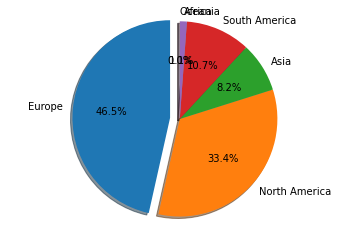

In [23]:
labels = 'Europe', 'North America', 'Asia', 'South America', 'Africa', 'Oceania'
sizes = [total_deaths_europe, total_deaths_NA, total_deaths_asia, total_deaths_SA, total_deaths_afrika, total_deaths_oceania]
explode = (0.1, 0, 0, 0, 0, 0)
fig, ax = plt.subplots ()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [24]:
# change name of the column of the country , to perform the merge with another dataset
worldmeters_coronavirus_df = worldmeters_coronavirus_df.rename(columns={"country_region": "Country_Region"})

In [25]:
worldmeters_coronavirus_df.Country_Region.value_counts()

Denmark            1
Eritrea            1
Tunisia            1
Lesotho            1
North Macedonia    1
                  ..
Thailand           1
Serbia             1
Mozambique         1
Iran               1
Belarus            1
Name: Country_Region, Length: 213, dtype: int64

In [26]:
# merge two datasets to answer question: Do countries where BCG vaccine was widely implemented have fewer infection rates per million?
merged_df = health_indicators_df.merge(worldmeters_coronavirus_df, on = ['Country_Region']) 

In [27]:
merged_df.head()

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total_cases,total_deaths,total_recovered,active_cases,critical,total cases/\n1M pop,deaths/\n1M pop,total_tests,tests/\n1M pop,population_y
0,Afghanistan,2020-02-24,2020-03-22,2020-03-14,2020-03-24,2020-03-27,0.174179,0.083333,8.953006,3.372082,...,"15,205",257,"1,328","13,620",19,391,7,"38,460",990,"38,848,565"
1,Albania,2020-03-09,2020-03-11,2020-03-10,2020-03-16,2020-03-23,0.068699,0.130051,27.016784,13.225390,...,"1,137",33,872,232,4,395,11,"14,723","5,116","2,878,043"
2,Algeria,2020-02-25,2020-03-12,2020-03-04,2020-03-16,2020-03-21,0.158588,0.228578,17.005476,6.481729,...,"9,394",653,"5,748","2,993",23,215,15,NaN,NaN,"43,780,936"
3,Andorra,2020-03-02,2020-03-22,2020-03-17,2020-03-19,2020-03-22,0.082774,0.345238,13.784688,17.879279,...,764,51,694,19,4,"9,889",660,"3,750","48,541","77,255"
4,Angola,2020-03-20,2020-03-29,NaN,NaN,NaN,0.132143,0.000000,4.480300,3.011632,...,86,4,18,64,1,3,0.1,"10,000",305,"32,768,267"


In [28]:
merged_df.columns

Index(['Country_Region', 'first_1ConfirmedCases', 'first_1Fatalities',
       'first_10ConfirmedCases', 'first_50ConfirmedCases',
       'first_100ConfirmedCases', 'cases_growth', 'death_growth',
       'Cardiovascular diseases (%)', 'Cancers (%)',
       'Diabetes, blood, & endocrine diseases (%)', 'Respiratory diseases (%)',
       'Liver disease (%)', 'Diarrhea & common infectious diseases (%)',
       'Musculoskeletal disorders (%)', 'HIV/AIDS and tuberculosis (%)',
       'Malaria & neglected tropical diseases (%)',
       'Nutritional deficiencies (%)', 'pneumonia-death-rates',
       'Share of deaths from smoking (%)', 'alcoholic_beverages',
       'animal_fats', 'animal_products', 'aquatic_products,_other',
       'cereals_-_excluding_beer', 'eggs', 'fish,_seafood',
       'fruits_-_excluding_wine', 'meat', 'milk_-_excluding_butter',
       'miscellaneous', 'offals', 'oilcrops', 'pulses', 'spices',
       'starchy_roots', 'stimulants', 'sugar_&_sweeteners', 'treenuts',
       '

In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 81 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country_Region                             164 non-null    object 
 1   first_1ConfirmedCases                      164 non-null    object 
 2   first_1Fatalities                          120 non-null    object 
 3   first_10ConfirmedCases                     141 non-null    object 
 4   first_50ConfirmedCases                     111 non-null    object 
 5   first_100ConfirmedCases                    102 non-null    object 
 6   cases_growth                               164 non-null    float64
 7   death_growth                               118 non-null    float64
 8   Cardiovascular diseases (%)                157 non-null    float64
 9   Cancers (%)                                157 non-null    float64
 10  Diabetes, blood, & endocri

In [118]:
mini_merged_df = merged_df[['Country_Region', 'bcg_coverage', 'total cases/\n1M pop']]
print(mini_merged_df)

    Country_Region  bcg_coverage total cases/\n1M pop
0      Afghanistan          86.0                  391
1          Albania          99.0                  395
2          Algeria          99.0                  215
3          Andorra           NaN                9,889
4           Angola          79.0                    3
..             ...           ...                  ...
159     Uzbekistan          99.0                  108
160      Venezuela          82.0                   53
161        Vietnam          97.0                    3
162         Zambia          99.0                   58
163       Zimbabwe          90.0                   12

[164 rows x 3 columns]


In [119]:
mini_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       164 non-null    object 
 1   bcg_coverage         134 non-null    float64
 2   total cases/
1M pop  164 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.1+ KB


In [120]:
# drop NaN values
mini_merged_df_na = mini_merged_df.dropna()
print(mini_merged_df_na)

# change NaN to zero value
# mini_merged_df_na_to_zero = mini_merged_df.fillna(value=0)
# print(mini_merged_df_na_to_zero)

    Country_Region  bcg_coverage total cases/\n1M pop
0      Afghanistan          86.0                  391
1          Albania          99.0                  395
2          Algeria          99.0                  215
4           Angola          79.0                    3
6        Argentina          99.0                  373
..             ...           ...                  ...
159     Uzbekistan          99.0                  108
160      Venezuela          82.0                   53
161        Vietnam          97.0                    3
162         Zambia          99.0                   58
163       Zimbabwe          90.0                   12

[134 rows x 3 columns]


In [121]:
# change dtype of only 1 column to int
mini_merged_df_na["total cases/\n1M pop"] = mini_merged_df_na["total cases/\n1M pop"].apply(lambda x: float(x.replace(',','')))
mini_merged_df_na.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 163
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       134 non-null    object 
 1   bcg_coverage         134 non-null    float64
 2   total cases/
1M pop  134 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.2+ KB


/Users/danielaullien/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:


# mini_merged_df_na_int = mini_merged_df_na['total cases/\n1M pop'].apply(mini_merged_df_na.to_numeric)
mini_merged_df_na_sorted = mini_merged_df_na.sort_values(by=['total cases/\n1M pop'])
print(mini_merged_df_na_sorted)

       Country_Region  bcg_coverage  total cases/\n1M pop
119  Papua New Guinea          65.0                   0.9
161           Vietnam          97.0                   3.0
4              Angola          79.0                   3.0
85               Laos          83.0                   3.0
27            Burundi          93.0                   5.0
..                ...           ...                   ...
75            Ireland          77.0                5066.0
33              Chile          93.0                5219.0
137         Singapore          99.0                5967.0
83             Kuwait          99.0                6341.0
125             Qatar          97.0               19783.0

[134 rows x 3 columns]


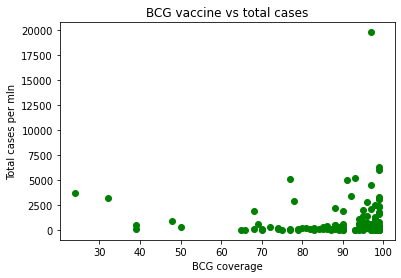

In [123]:
# show distribution of the results
plt.scatter(mini_merged_df_na_sorted['bcg_coverage'], mini_merged_df_na_sorted['total cases/\n1M pop'], color = 'green')

# reduce the number of values presented in Y axis
# ticks = list(mini_merged_df_na_to_zero_sorted['total cases/\n1M pop'])
# plt.yticks([ticks[i] for i in range(len(ticks)) if i % 50 == 0], rotation='horizontal')

plt.title("BCG vaccine vs total cases")
plt.xlabel("BCG coverage")
plt.ylabel("Total cases per mln")
plt.show()

In [16]:
bcg_df.columns


Index(['Country', ' 2018', ' 2017', ' 2016', ' 2015', ' 2014', ' 2013',
       ' 2012', ' 2011', ' 2010', ' 2009', ' 2008', ' 2007', ' 2006', ' 2005',
       ' 2004', ' 2003', ' 2002', ' 2001', ' 2000', ' 1999', ' 1998', ' 1997',
       ' 1996', ' 1995', ' 1994', ' 1993', ' 1992', ' 1991', ' 1990', ' 1989',
       ' 1988', ' 1987', ' 1986', ' 1985', ' 1984', ' 1983', ' 1982', ' 1981',
       ' 1980'],
      dtype='object')

In [17]:
bcg_df.head(10)

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,Afghanistan,78.0,78.0,78.0,76.0,74.0,72.0,78.0,71.0,68.0,...,38.0,40.0,27.0,18.0,17.0,11.0,10.0,10.0,NaN,NaN
1,Albania,99.0,99.0,99.0,99.0,99.0,99.0,96.0,97.0,99.0,...,94.0,92.0,92.0,92.0,92.0,90.0,90.0,92.0,93.0,93.0
2,Algeria,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,96.0,96.0,93.0,88.0,86.0,NaN,NaN,NaN,NaN,NaN
3,Angola,86.0,83.0,49.0,69.0,72.0,71.0,73.0,74.0,79.0,...,47.0,32.0,29.0,32.0,28.0,28.0,25.0,NaN,NaN,NaN
4,Argentina,93.0,95.0,92.0,96.0,99.0,99.0,99.0,99.0,99.0,...,92.0,91.0,94.0,99.0,90.0,78.0,70.0,77.0,70.0,62.0
5,Armenia,99.0,99.0,99.0,99.0,99.0,99.0,96.0,96.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0
7,Azerbaijan,97.0,97.0,98.0,98.0,98.0,98.0,98.0,99.0,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Bangladesh,99.0,99.0,99.0,99.0,99.0,99.0,98.0,99.0,98.0,...,56.0,26.0,15.0,4.0,2.0,2.0,2.0,1.0,1.0,NaN
9,Belarus,98.0,98.0,98.0,97.0,98.0,99.0,98.0,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
bcg_df[' 2018'].describe()

count    156.000000
mean      90.737179
std       11.706140
min       26.000000
25%       88.750000
50%       95.000000
75%       98.000000
max       99.000000
Name:  2018, dtype: float64

In [21]:
bcg_df[' 1980'].describe()

count    78.000000
mean     58.192308
std      30.362339
min       2.000000
25%      33.250000
50%      61.500000
75%      85.000000
max      99.000000
Name:  1980, dtype: float64

In [23]:
life_expectance_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [25]:
life_expectance_df['Year'].describe()


count    2938.000000
mean     2007.518720
std         4.613841
min      2000.000000
25%      2004.000000
50%      2008.000000
75%      2012.000000
max      2015.000000
Name: Year, dtype: float64

In [24]:
life_expectance_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
